<a href="https://colab.research.google.com/github/LucasCalbucuraZ/MOS/blob/main/MOS_operacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @ Lucas Calbucura Zúñiga. Lcalbucura2017@udec.cl

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib import style
import seaborn as sns
import datetime
from datetime import datetime, timedelta

# Utilidades
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from random import randint


# Cargamos los 1097 datos diarios desde GitHub, es importante que los archivos estén en formato .csv
# Hasta el momento se tienen las variables T2, T2_WRF, P_WRF, U10_WRF, V10_WRF (Mean, Max y Min)
# ==============================================================================
APIAO= pd.read_csv('https://raw.githubusercontent.com/AndresSepulveda/PHP_LucasC/main/Datos/APIAO_diario.csv'); APIAO = APIAO.drop(['Time'], axis=1)
CUCAO = pd.read_csv('https://raw.githubusercontent.com/AndresSepulveda/PHP_LucasC/main/Datos/CUCAO_diario.csv'); CUCAO = CUCAO.drop(['Time'], axis=1)
MELINKA = pd.read_csv('https://raw.githubusercontent.com/AndresSepulveda/PHP_LucasC/main/Datos/MELINKA_diario.csv'); MELINKA = MELINKA.drop(['Time'], axis=1)

# Se genera el vector fecha (desde el 1 de agosto de 2018 al 1 de agosto de 2021)
# ==============================================================================
t = np.arange(np.datetime64('2018-08-01'), np.datetime64('2021-08-02'))
time= pd.to_datetime(t)

# Para revisar si existen datos faltantes
# ==============================================================================
# CUCAO["Mean_WRF"].isnull().sum().sum() 

# Interpolamos los NaN para poder construir la regresión lineal múltiple  
# ==============================================================================
# APIAO (T2_WRF, P_WRF, U10_WRF, V10_WRF )
T2_WRF_Max=APIAO["T2_WRF_max"].interpolate(method='polynomial',order=2); APIAO["T2_WRF_max"]=T2_WRF_Max.to_frame()
P_WRF_Max= APIAO["P_WRF_max"].interpolate(method='polynomial', order=2);  APIAO["P_WRF_max"]=P_WRF_Max.to_frame()
U10_WRF_Max= APIAO["U10_WRF_max"].interpolate(method='polynomial', order=2); APIAO["U10_WRF_max"]=U10_WRF_Max.to_frame()
V10_WRF_Max= APIAO["V10_WRF_max"].interpolate(method='polynomial', order=2); APIAO["V10_WRF_max"]=V10_WRF_Max.to_frame()
del T2_WRF_Max; del P_WRF_Max; del U10_WRF_Max; del V10_WRF_Max;
# ==============================================================================
# CUCAO (T2_WRF, P_WRF, U10_WRF, V10_WRF, por ahora... )
T2_WRF_Max=CUCAO["T2_WRF_max"].interpolate(method='polynomial',order=2); CUCAO["T2_WRF_max"]=T2_WRF_Max.to_frame()
P_WRF_Max= CUCAO["P_WRF_max"].interpolate(method='polynomial', order=2);  CUCAO["P_WRF_max"]=P_WRF_Max.to_frame()
U10_WRF_Max= CUCAO["U10_WRF_max"].interpolate(method='polynomial', order=2);  CUCAO["U10_WRF_max"]=U10_WRF_Max.to_frame()
V10_WRF_Max= CUCAO["V10_WRF_max"].interpolate(method='polynomial', order=2); CUCAO["V10_WRF_max"]=V10_WRF_Max.to_frame()
del T2_WRF_Max; del P_WRF_Max; del U10_WRF_Max; del V10_WRF_Max; 
# ==============================================================================
# MELINKA (T2_WRF, P_WRF, U10_WRF, V10_WRF, por ahora... )
T2_WRF_Max = MELINKA["T2_WRF_max"].interpolate(method='polynomial',order=2); MELINKA["T2_WRF_max"]=T2_WRF_Max.to_frame()
P_WRF_Max  = MELINKA["P_WRF_max"].interpolate(method='polynomial', order=2);  MELINKA["P_WRF_max"]=P_WRF_Max.to_frame()
U10_WRF_Max= MELINKA["U10_WRF_max"].interpolate(method='polynomial', order=2); MELINKA["U10_WRF_max"]=U10_WRF_Max.to_frame()
V10_WRF_Max= MELINKA["V10_WRF_max"].interpolate(method='polynomial', order=2); MELINKA["V10_WRF_max"]=V10_WRF_Max.to_frame()
del T2_WRF_Max; del P_WRF_Max; del U10_WRF_Max; del V10_WRF_Max;

# Interpolamos los NaN para poder construir la regresión lineal múltiple  
# ==============================================================================
# APIAO (T2_WRF, P_WRF, U10_WRF, V10_WRF, por ahora... )
T2_WRF_Min=APIAO["T2_WRF_min"].interpolate(method='polynomial',order=2); APIAO["T2_WRF_min"]=T2_WRF_Min.to_frame()
P_WRF_Min= APIAO["P_WRF_min"].interpolate(method='polynomial', order=2);  APIAO["P_WRF_min"]=P_WRF_Min.to_frame()
U10_WRF_Min= APIAO["U10_WRF_min"].interpolate(method='polynomial', order=2); APIAO["U10_WRF_min"]=U10_WRF_Min.to_frame()
V10_WRF_Min= APIAO["V10_WRF_min"].interpolate(method='polynomial', order=2); APIAO["V10_WRF_min"]=V10_WRF_Min.to_frame()
del T2_WRF_Min; del P_WRF_Min; del U10_WRF_Min; del V10_WRF_Min;
# ==============================================================================
# CUCAO (T2_WRF, P_WRF, U10_WRF, V10_WRF, por ahora... )
T2_WRF_Min=CUCAO["T2_WRF_min"].interpolate(method='polynomial',order=2); CUCAO["T2_WRF_min"]=T2_WRF_Min.to_frame()
P_WRF_Min= CUCAO["P_WRF_min"].interpolate(method='polynomial', order=2);  CUCAO["P_WRF_min"]=P_WRF_Min.to_frame()
U10_WRF_Min= CUCAO["U10_WRF_min"].interpolate(method='polynomial', order=2);  CUCAO["U10_WRF_min"]=U10_WRF_Min.to_frame()
V10_WRF_Min= CUCAO["V10_WRF_min"].interpolate(method='polynomial', order=2); CUCAO["V10_WRF_min"]=V10_WRF_Min.to_frame()
del T2_WRF_Min; del P_WRF_Min; del U10_WRF_Min; del V10_WRF_Min; 
# ==============================================================================
# MELINKA (T2_WRF, P_WRF, U10_WRF, V10_WRF, por ahora... )
T2_WRF_Min = MELINKA["T2_WRF_min"].interpolate(method='polynomial',order=2); MELINKA["T2_WRF_min"]=T2_WRF_Min.to_frame()
P_WRF_Min  = MELINKA["P_WRF_min"].interpolate(method='polynomial', order=2);  MELINKA["P_WRF_min"]=P_WRF_Min.to_frame()
U10_WRF_Min= MELINKA["U10_WRF_min"].interpolate(method='polynomial', order=2); MELINKA["U10_WRF_min"]=U10_WRF_Min.to_frame()
V10_WRF_Min= MELINKA["V10_WRF_min"].interpolate(method='polynomial', order=2); MELINKA["V10_WRF_min"]=V10_WRF_Min.to_frame()
del T2_WRF_Min; del P_WRF_Min; del U10_WRF_Min; del V10_WRF_Min;

ESTACION = MELINKA # Elegir entre APIAO, CUCAO O MELINKA 

# Seleccionamos las variables predictoras y generamos una matriz de correlación
# ==============================================================================
predictores = ESTACION.filter(['T2_WRF_max','P_WRF_max','U10_WRF_max','V10_WRF_max'], axis=1)
predictores.columns=['T2','P','U10','V10']


# Estandarizamos
# ==============================================================================
sc=StandardScaler()
predictores_std = sc.fit_transform(predictores)
predictors = pd.DataFrame(predictores_std, columns = ['T2','P','U10','V10'])

def tidy_corr_matrix(corr_mat):
    '''
    Función para generar la matriz de correlación
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = predictors.select_dtypes(include=['float64', 'int']).corr(method='pearson')


# División de los datos en train y test
# ==============================================================================
# Filtramos el dataframe considerando sólo los máximos diarios
data = ESTACION.filter(['T2_max','T2_WRF_max','P_WRF_max','U10_WRF_max','V10_WRF_max'], axis=1)
y = data['T2_max'] # Variable dependiente (en este caso son las observaciones)

# Acá dividimos los datos conservando el primer 90% para entrenar el modelo derivando los coeficientes de regresión y luego
# los aplicamos en el 10% no utilizado. Lo anterior también se conoce como validación cruzada (o cross-validation) y es la
# mejor forma de cuantificar la precisión o skill de MOS (o de cualquier predicción estadística..)
#X_train, X_test, y_train, y_test = train_test_split(
                                        #predictores,
                                        #y.values.reshape(-1,1),
                                        #train_size   = 0.9995,       # Ahora se entrena el modelo con el 99.95% de los datos, para 1 dia de pronóstico
                                        #shuffle      = False      # División lineal ya que los datos tienen un orden temporal
                                    #)

# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
#X_train = sm.add_constant(X_train, prepend=True)
#modelo = sm.OLS(endog=y_train, exog=X_train,)
#modelo = modelo.fit()
#print(modelo.summary())


trainX_list=[[]]
trainY_list=[[]]
testX_list=[[]]
testY_list=[[]]
for i in range (0,999):
    X_train, X_test, y_train, y_test = train_test_split(
                                            predictores,
                                            y.values.reshape(-1,1),
                                            train_size   = 0.90,
                                            random_state=i,
                                            shuffle = True
                                        )

    trainX_list.append([X_train])
    trainY_list.append([y_train])
    testX_list.append([X_test])
    testY_list.append([y_test])


# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
#df = pd.DataFrame([trainX_list])
#df2 = pd.DataFrame([trainY_list])
#trainX_list = sm.add_constant(df, prepend=True)
#modelo = sm.OLS(endog=df2, exog=df,)
#modelo = modelo.fit()
#print(modelo.summary())


    
#B = np.mean(ESTACION["T2_WRF_max"]) - np.mean(data['T2_max'])


TypeError: ignored

In [ ]:
hist( dataVariable, bins=x, edgecolor=’anyColor’ )

ValueError: ignored

In [ ]:
# Predicciones con el 90% de los datos entrenados con intervalo de confianza del 95%
# ==============================================================================
predicciones_xtrain = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
#predicciones_xtrain.isnull().sum().sum() #para revisar los NaN

# Predicciones con el 10% restante de datos.. 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True,has_constant='add')
predicciones_xtest = modelo.predict(exog = X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
MOS_APIAO=predicciones_xtest
OBS_APIAO=y_test
WRF_APIAO=ESTACION['T2_WRF_max'].iloc[1096]

# Para hacerlo operacional se debe considerar la corrección para el último día de pronóstico..
# se entrena el modelo estadístico con 1096 datos y se evalua con el último dato restante

#Diferencia entre simulado y observado (Tmax)
sesgo1 = np.mean(WRF_APIAO) - np.mean(OBS_APIAO)
print(sesgo1)

#Diferencia entre corregido y observado (Tmax)
sesgo2 = np.mean(MOS_APIAO) - np.mean(OBS_APIAO)
print(sesgo2)


-1.0714890000000015
-0.12085102480261156


In [ ]:
MOS_CUCAO=predicciones_xtest
OBS_CUCAO=y_test
WRF_CUCAO=ESTACION['T2_WRF_max'].iloc[1096]

# Para hacerlo operacional se debe considerar la corrección para el último día de pronóstico..
# se entrena el modelo estadístico con 1096 datos y se evalua con el último dato restante

#Diferencia entre simulado y observado (Tmax)
sesgo1 = np.mean(WRF_CUCAO) - np.mean(OBS_CUCAO)
print(sesgo1)

#Diferencia entre corregido y observado (Tmax)
sesgo2 = np.mean(MOS_CUCAO) - np.mean(OBS_CUCAO)
print(sesgo2)


-0.14397700000000135
1.2930649281760207


In [ ]:
MOS_MELINKA=predicciones_xtest
OBS_MELINKA=y_test
WRF_MELINKA=ESTACION['T2_WRF_max'].iloc[1096]

# Para hacerlo operacional se debe considerar la corrección para el último día de pronóstico..
# se entrena el modelo estadístico con 1096 datos y se evalua con el último dato restante

#Diferencia entre simulado y observado (Tmax)
sesgo1 = np.mean(WRF_MELINKA) - np.mean(OBS_MELINKA)
print(sesgo1)

#Diferencia entre corregido y observado (Tmax)
sesgo2 = np.mean(MOS_MELINKA) - np.mean(OBS_MELINKA)
print(sesgo2)


-0.14834500000000084
0.932482711488019


 # **EVENTO EXTREMO DE TEMPERATURA EN MELINKA**







In [ ]:
# ahora veré como funciona MOS para el caso de la ola de calor en Melinka durante el 7 y 10 de Febrero de 2021
# 7 de febrero posicion 922-1 hasta 10 de febrero posicion 925-1

# División de los datos en train y test (Filtramos el dataframe considerando sólo los máximos diarios)
# ==============================================================================
data = ESTACION.filter(['T2_max','T2_WRF_max','P_WRF_max','U10_WRF_max','V10_WRF_max'], axis=1)
y = data['T2_max'] # Variable dependiente (en este caso son las observaciones)

# Se entrena el modelo con los 921 primeros datos (0-920 en python) que seŕia el 83.9%, el 921 (922-1) es el 7 de febrero..  

X_train, X_test, y_train, y_test = train_test_split(
                                        predictores,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.839,       
                                        shuffle      = False      # División lineal ya que los datos tienen un orden temporal
                                    )

# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

# ==============================================================================
predicciones_xtrain = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
#predicciones_xtrain.isnull().sum().sum() #para revisar los NaN

# Predicciones con el 10% restante de datos.. 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones_xtest = modelo.predict(exog = X_test)

# Reconstruccion serie de tiempo MOS (sumamos las predicciones obtenidas con el 90% de xtrain y el 10% de xtest )
# recordar que x son las variables predictoras 
reconstruccion=pd.concat([predicciones_xtrain["mean"],
                         predicciones_xtest], 
                         axis=0
                         )
OBS =ESTACION['T2_max'].values.reshape(-1,1)
MOS = reconstruccion.values.reshape(-1,1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1243.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:41:58   Log-Likelihood:                -1735.2
No. Observations:                 920   AIC:                             3480.
Df Residuals:                     915   BIC:                             3504.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -64.0243     10.029     -6.384      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
mos_melinka=MOS[921:925]
obs_melinka=OBS[921:925]
wrf_melinka=MELINKA["T2_WRF_max"].iloc[921:925]

tt = np.arange(np.datetime64('2021-02-07'), np.datetime64('2021-02-11'))
ttime= pd.to_datetime(tt)

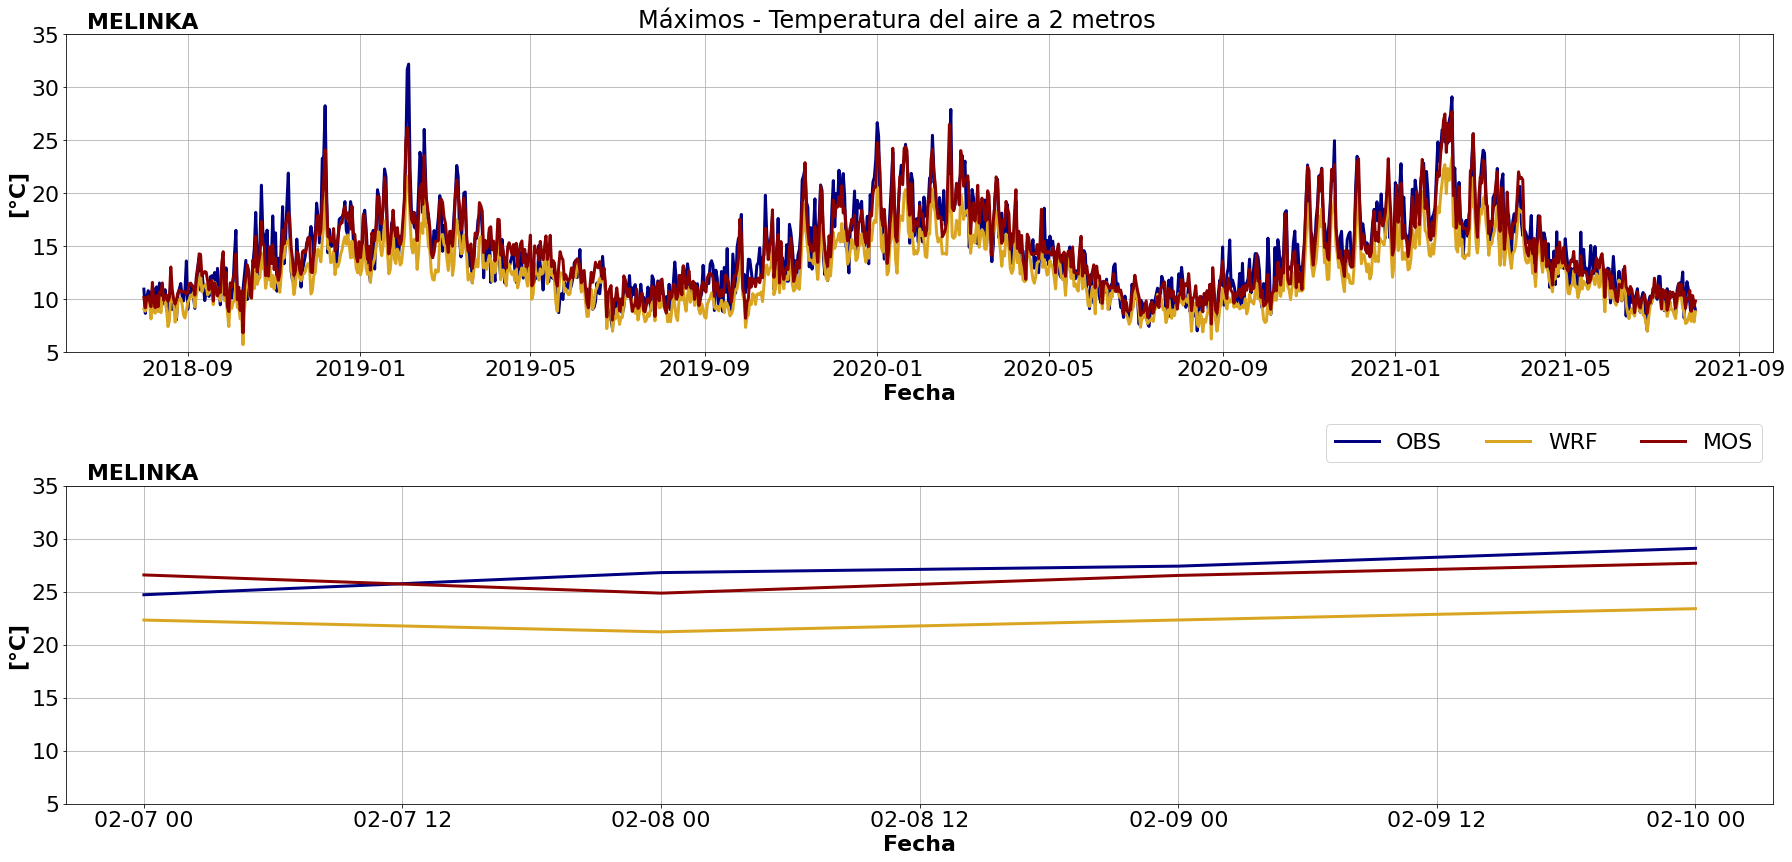

In [ ]:
# SERIES DE TIEMPO PARA LOS MAXIMOS DIARIOS EN MELINKA 
# ======================================================================================
fig, ax = plt.subplots(2,figsize=(25,12), sharex=False)
fig.suptitle('Máximos - Temperatura del aire a 2 metros',x=0.5,y=0.994,fontsize=24)
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22) 
# MELINKA
ax[0].plot(time,OBS,color='navy',linewidth=3,label='OBS') #Observado
ax[0].plot(time,MELINKA["T2_WRF_max"],color='goldenrod',linewidth=3,label='WRF') #Simulado 
ax[0].plot(time,MOS,color='darkred',linewidth=3,label='MOS') #Corregido
ax[0].set_xlabel('Fecha', fontsize = 22, weight='bold')
ax[0].set_ylabel('[°C]', fontsize = 22, weight='bold')
ax[0].set_ylim(5,35)
ax[0].yaxis.set_major_locator(loc)
ax[0].set_title('MELINKA',fontsize=22,x=0.045, y=1, weight='bold')
ax[0].grid(True)
fig.tight_layout()

# MELINKA OLA DE CALOR
ax[1].plot(ttime,obs_melinka,color='navy',linewidth=3,label='OBS') #Observado
ax[1].plot(ttime,wrf_melinka,color='goldenrod',linewidth=3,label='WRF') #Simulado 
ax[1].plot(ttime,mos_melinka,color='darkred',linewidth=3,label='MOS') #Corregido
ax[1].set_xlabel('Fecha', fontsize = 22, weight='bold')
ax[1].set_ylabel('[°C]', fontsize = 22, weight='bold')
ax[1].set_ylim(5,35)
ax[1].yaxis.set_major_locator(loc)
ax[1].set_title('MELINKA',fontsize=22,x=0.045, y=1, weight='bold')
ax[1].grid(True)
ax[1].legend(fontsize=22,loc='upper right',bbox_to_anchor=(1.0, 1.229),ncol=3)
fig.tight_layout()
plt.savefig("T2_max_MELINKA.png")


In [ ]:
# SESGO para la ola de calor en melinka 

#Diferencia entre simulado y observado (Tmax)
sesgo1 = np.mean(wrf_melinka) - np.mean(obs_melinka)
print(sesgo1)

#Diferencia entre corregido y observado (Tmax)
sesgo2 = np.mean(mos_melinka) - np.mean(obs_melinka)
print(sesgo2)


-4.689812499999999
-0.5888900326049153
